In [4]:
# Import dataset
import numpy as np
#import pandas as pd
from scipy.optimize import minimize
# train_X = pd.read_csv('../p1Data/train_X.csv',header=None)
# train_y = pd.read_csv('../p1Data/train_y.csv',header=None)
# validation_X = pd.read_csv('../p1Data/validation_X.csv',header=None)
# validation_y = pd.read_csv('../p1Data/validation_y.csv',header=None)
train_X = np.genfromtxt('../p1Data/train_X.csv',delimiter=',')
train_y = np.genfromtxt('../p1Data/train_y.csv',delimiter=',')
validation_X = np.genfromtxt('../p1Data/validation_X.csv',delimiter=',')
validation_y = np.genfromtxt('../p1Data/validation_y.csv',delimiter=',')
test_X = np.genfromtxt('../p1Data/test_X.csv',delimiter=',')
test_y = np.genfromtxt('../p1Data/test_y.csv',delimiter=',')

In [5]:
# Calculate closed form solution for lasso regression using Shooting Algorithm
def lasso_shooting(X,y,lambda_reg=0.1,steps = 1000):
    #Get dimension info
    n = X.shape[0]
    d = X.shape[1]
    #initializing theta
    w = np.linalg.inv(X.T.dot(X)+lambda_reg*np.identity(d)).dot(X.T).dot(y) # result w dimension: d
    def soft(a,delta):
        sign_a = np.sign(a)
        if np.abs(a)-delta <0:
            return 0 
        else:
            return sign_a*(abs(a)-delta)
    for step in range(steps):
        a = []
        c = []
    ####For loop for computing aj cj wj
        for j in range(d):
            aj = 0
            cj = 0
            for i in range(n):
                xij = X[i,j]
                aj += 2*xij*xij
                cj += 2*xij*(y[i]-w.T.dot(X[i,:])+w[j]*xij)
            w[j] = soft(cj/aj,lambda_reg/aj)
            a.append(aj)
            c.append(cj)
        a = np.array(a)
        c = np.array(c)
    return w,a,c

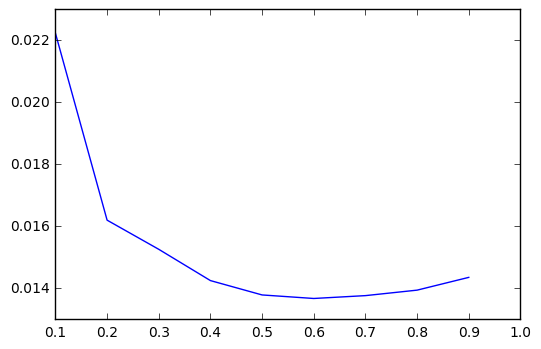

In [7]:
sqr_loss = []
for lambda_reg in np.arange(0.1,1,0.1):
    w,a,c = lasso_shooting(train_X,train_y,lambda_reg)
    validation_predict = validation_X.dot(w)
    diff = validation_predict - validation_y
    sqr_loss.append(1/validation_y.shape[0]*np.dot(diff,diff.T))
import matplotlib.pyplot as plt
plt.plot(np.arange(0.1,1,0.1),sqr_loss)
plt.show()

In [144]:
def lasso_shooting_vectorize(X,y,lambda_reg=0.1):
    n = X.shape[0]
    d = X.shape[1]
    #initializing theta
    w = np.linalg.inv(X.T.dot(X)+lambda_reg*np.identity(d)).dot(X.T).dot(y) # result w dimension: d
    def soft(a,delta):
        sign_a = np.sign(a)
        pos_part = np.abs(a)-delta
        pos_part[pos_part<0] = 0  
        return sign_a*pos_part
    # Instead of loop calculate a c w using matrix operation
    # Store a c w into three d-dimension vector
    # a can be calculated using the diagonal elements of XT.X
    a = 2*X.T.dot(X).diagonal()
    # steps for calculating c
    # duplicate y-wx d times
    y_wx = np.tile(y-X.dot(w),(d,1))
    # duplicate w n times
    w_n = np.tile(w,(n,1))
    # elementwise multiplication of w_n and x
    wixij =w_n*X
    # elementwise addition 
    right = y_wx.T + wixij
    # return c
    c = 2*(X.T.dot(right).diagonal())
    w = soft(a/c,lambda_reg/a)
    return a,c,w

In [145]:
#Debug Session
X = train_X
y = train_y
n = X.shape[0]
d = X.shape[1]

In [147]:
w,a,c = lasso_shooting(train_X,train_y)
a_vec,c_vec,w_vec = lasso_shooting_vectorize(train_X,train_y)
a-a_vec,c-c_vec

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         -7.10542736e-15,  -7.10542736e-15,   7.10542736e-15,
          7.10542736e-15,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,  -7.10542736e-15,
          0.00000000e+00,   0.00000000e+00,  -7.10542736e-15,
          0.00000000e+00,   0.00000000e+00,   7.10542736e-15,
          0.00000000e+00,   0.00000000e+00,  -7.10542736e-15,
          0.00000000e+00,   7.10542736e-15,   0.00000000e+00,
          7.10542736e-15,   0.00000000e+00,   0.00000000e+00,
          1.42108547e-14,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,  -7.10542736e-15,
          0.00000000e+00,   0.00000000e+00,  -7.10542736e-15,
         -7.10542736e-15,   0.00000000e+00,  -7.10542736e-15,
          0.00000000e+00,   0.00000000e+00,  -7.10542736e-15,
          0.00000000e+00,   0.00000000e+00,  -7.10542736e-15,
          0.00000000e+00,   7.10542736e-15,   1.42108547e-14,
        

In [148]:
w

array([  9.67680142e+00,  -9.71029138e+00,  -1.02418810e+01,
        -9.31004806e+00,   9.07793212e+00,  -9.05999811e+00,
        -8.52184963e+00,  -1.00282071e+01,   9.51529584e+00,
         9.72904346e+00,   1.46758745e-01,   4.69181108e-02,
         4.33935470e-01,   1.93589905e-01,   1.43468906e-01,
         9.63279800e-01,  -5.98100557e-01,  -1.19351286e-01,
         7.45337342e-01,   2.69650796e-01,  -7.69002735e-01,
        -7.82289392e-02,  -6.16745461e-01,  -1.14938799e-01,
        -7.23383234e-04,  -3.86380207e-01,  -4.29700888e-02,
         2.09351381e-01,  -2.40513976e-01,  -2.32339738e-01,
        -2.44514305e-01,   9.82460656e-02,  -2.52070358e-01,
        -4.99861848e-01,  -5.23846078e-01,   1.61702461e-01,
        -2.11407781e-01,   4.79632170e-01,   5.91968679e-01,
        -8.15972445e-01,   3.92547647e-01,  -4.77958953e-01,
         4.79173879e-01,  -1.86983214e-01,   7.28736700e-02,
        -1.70861207e-01,   3.28543324e-01,  -2.94174863e-01,
         6.26949454e-01,